<a href="https://colab.research.google.com/github/RajaSubramanian10/Diabetes-Classifier/blob/main/Diabetes_Classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

@Author: R. Raja Subramanian

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
def PrecisionRecallCurve(y_test, y_pred, classifier):
  average_precision = average_precision_score(y_test, y_pred)
  print('Average precision-recall score: {0:0.2f}'.format(average_precision)) 
  disp = plot_precision_recall_curve(classifier, xtest, y_test)
  disp.ax_.set_title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

import sklearn.metrics as metrics
def roccurve(y_test, y_pred):
  fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [ ]:
data = pd.read_csv("Diabetes_Classification( from DATA world).csv")

cs = {'female': 0, 'male': 1}
data['Gender'] = data['Gender'].map(cs)
diab = {'No diabetes': 0, 'Diabetes': 1}
data['Diabetes'] = data['Diabetes'].map(diab  )
X = data[["Age", "Gender", "Height", "Weight", "Systolic BP", "Diastolic BP"]]
y = data["Diabetes"]

Accuracy: 0.7863247863247863


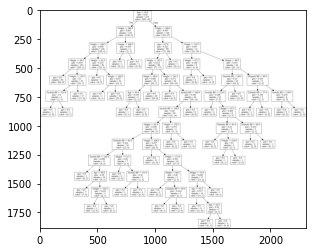

In [ ]:
#Decision Tree Classifier
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn import metrics

xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=.30, random_state=101)

dtree = DecisionTreeClassifier()
dtree = dtree.fit(xtrain, ytrain)

ypred = dtree.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

data = tree.export_graphviz(dtree, out_file=None, feature_names=["Age", "Gender", "Height", "Weight", "Systolic BP", "Diastolic BP"])
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('decisiontree_diabetesresult.png')


img=pltimg.imread('decisiontree_diabetesresult.png')
imgplot = plt.imshow(img)
plt.show()

Average precision-recall score: 0.18


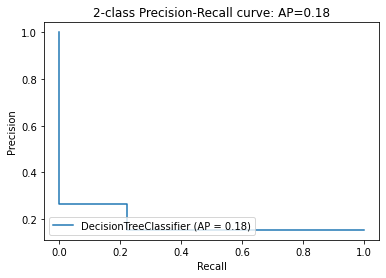

In [ ]:
PrecisionRecallCurve(ytest,ypred,dtree)

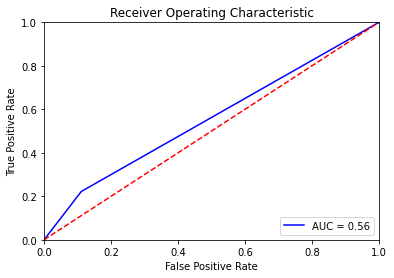

In [ ]:
roccurve(ytest,ypred)

In [ ]:
#Gaussian Classifier (Naive Bayes)

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.8632478632478633


Average precision-recall score: 0.25


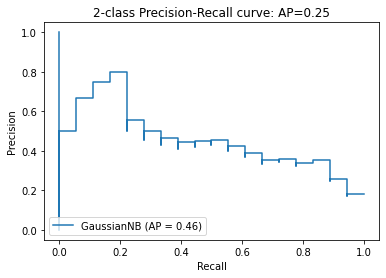

In [ ]:
PrecisionRecallCurve(ytest,ypred,model)

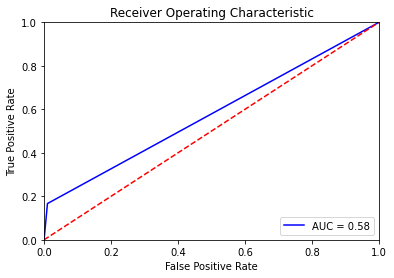

In [ ]:
roccurve(ytest,ypred)

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.8461538461538461


Average precision-recall score: 0.15


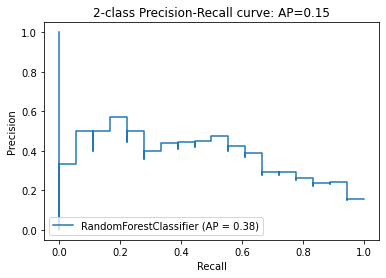

In [ ]:
PrecisionRecallCurve(ytest,ypred,clf)

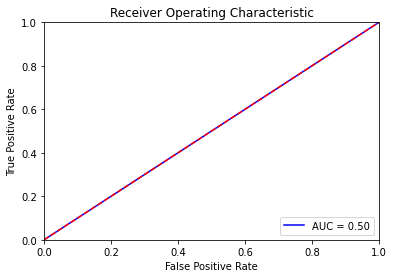

In [ ]:
roccurve(ytest,ypred)

In [ ]:
# Linear Kernel SVM Classifier
from sklearn.svm import SVC
sv1 = SVC(kernel = "linear")
sv1.fit(xtrain,ytrain)
ypred = sv1.predict(xtest)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[99  0]
 [18  0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        99
           1       0.00      0.00      0.00        18

    accuracy                           0.85       117
   macro avg       0.42      0.50      0.46       117
weighted avg       0.72      0.85      0.78       117



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision-recall score: 0.15


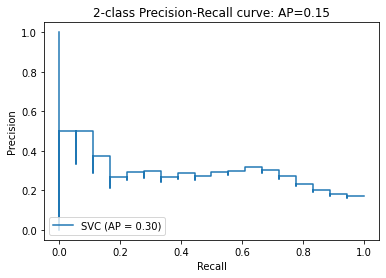

In [ ]:
PrecisionRecallCurve(ytest,ypred,sv1)

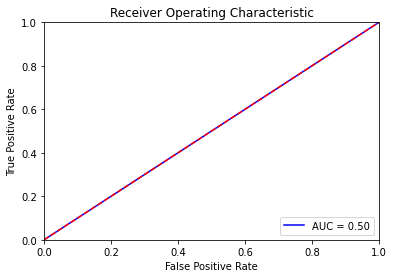

In [ ]:
roccurve(ytest,ypred)

In [ ]:
# Polynomial Kernel SVM Classifier
from sklearn.svm import SVC
sv2 = SVC(kernel = "poly", degree=10)
sv2.fit(xtrain,ytrain)
ypred = sv2.predict(xtest)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[91  8]
 [15  3]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        99
           1       0.27      0.17      0.21        18

    accuracy                           0.80       117
   macro avg       0.57      0.54      0.55       117
weighted avg       0.77      0.80      0.78       117



Average precision-recall score: 0.17


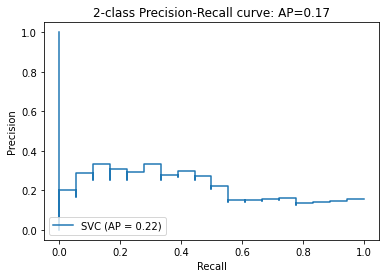

In [ ]:
PrecisionRecallCurve(ytest,ypred,sv2)

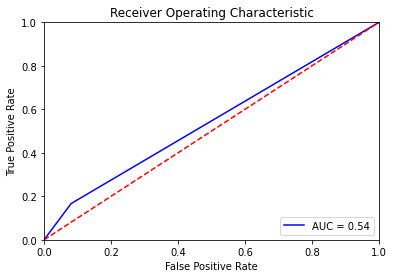

In [ ]:
roccurve(ytest,ypred)

In [ ]:
# RBF Kernel SVM Classifier
from sklearn.svm import SVC
sv3 = SVC(kernel = "rbf")
sv3.fit(xtrain,ytrain)
ypred = sv3.predict(xtest)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))  

[[99  0]
 [18  0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        99
           1       0.00      0.00      0.00        18

    accuracy                           0.85       117
   macro avg       0.42      0.50      0.46       117
weighted avg       0.72      0.85      0.78       117



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision-recall score: 0.15


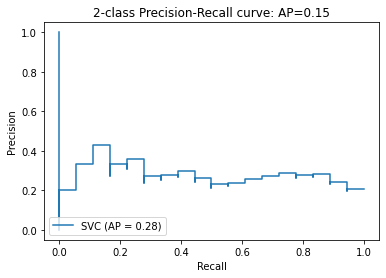

In [ ]:
PrecisionRecallCurve(ytest,ypred,sv3)

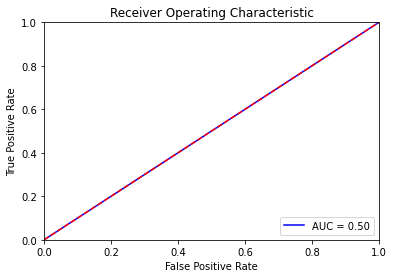

In [ ]:
roccurve(ytest,ypred)

In [ ]:
# Sigmoid Kernel SVM Classifier
from sklearn.svm import SVC
sv4 = SVC(kernel = "sigmoid")
sv4.fit(xtrain,ytrain)
ypred = sv4.predict(xtest)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

[[99  0]
 [18  0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        99
           1       0.00      0.00      0.00        18

    accuracy                           0.85       117
   macro avg       0.42      0.50      0.46       117
weighted avg       0.72      0.85      0.78       117



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Average precision-recall score: 0.15


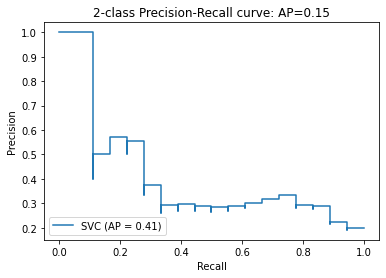

In [ ]:
PrecisionRecallCurve(ytest,ypred,sv4)

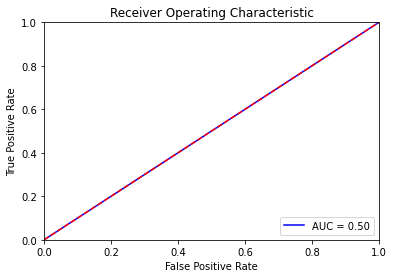

In [ ]:
roccurve(ytest,ypred)